## Lab 5: Generating Random Samples of Continuous Random Variables
#### MTHE 224 Fall 2023
### Continuous Random Variables
The <code>numpy</code> module has several methods to create random values that are distributed like continuous random variables. For example, the command <code>np.random.exponential(2)</code> produces a random number that is exponentially distributed with rate $\lambda = 2$. 

We can verify this by generating a lot of these random numbers, and comparing the resulting histogram with the pdf for the exponential distribution: $$ f(t) = \begin{cases} \frac{1}{\lambda}e^{-\frac{t}{\lambda}} & t\ge 0 \\ 0 & t < 0. \end{cases}$$
By using a lot of bins, we can get a fairly nice match between the histogram and the pdf.

<b> Note:</b> In class we defined the exponential distribution a little differently. There are a few equivalent definitions floating around, and python uses the one above. 

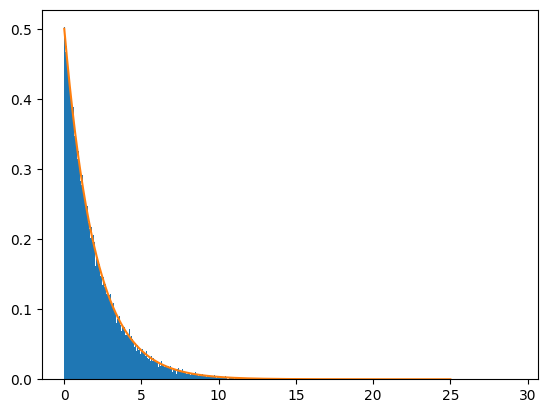

In [9]:
import numpy as np
from matplotlib import pyplot as plt

trials = np.random.exponential(2,100000) # Generate 100000 exponentially distributed random numbers
plt.hist(trials, bins = 1000,density =True); # Histogram with 1000 bins 

x = np.linspace(0,25,1000) # create many x values
y = [1/2*np.exp(-1/2*t) for t in x] # pmf evaluated at x values
plt.plot(x,y) # plot of pmf

#### Generating random numbers with arbitrary distributions:

While numpy has methods to generate random numbers in line with common distributions, it does not directly have the capability of generating random numbers for any distribution. For example, there is no function to generate random numbers that have a distribution with the pdf $$f(x) = \begin{cases} \frac{3}{4}(1-x^2) & x \in(-1,1)\\ 0 & x\notin (-1,1).\end{cases}$$ 

As long as we can find the CDF for our distribution, and the CDF is invertible, then we can use the inverse CDF to generate random numbers. The process is best illustrated with an example:

<b> Example:</b> We know the exponential distribution has the pdf $f(x) = \frac{1}{\lambda}e^{-x/\lambda}$ for any $x \ge 0$,  and therefore the cdf is 
$$
F(x) = \int_{0}^x \frac{1}{\lambda}e^{-t/\lambda}dt = -e^{-t/\lambda}\bigg\vert_0^x = 1-e^{-x/\lambda}.
$$

To find the inverse, we set $F(y) = x$ and solve for $y$. This gives 
$$ F^{-1}(x) = -\lambda \ln(1-x). $$

Since the values of the cdf are always between 0 and 1, we can feed a uniform random number that is between 0 and 1 to $F^{-1}$, and the result will be distributed according to $F(x)$. To test that this works, let's sample 10,000 numbers using the inverse CDF we just found with $\lambda = 2$, and compare to the pdf for the exponential distribution.


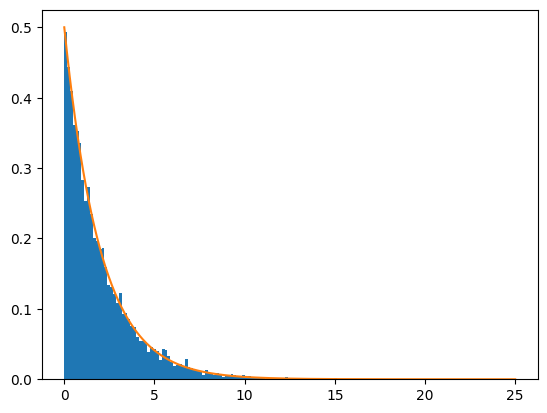

In [12]:
def inverse_exponential_CDF(x,lam): # Inverse CDF found by hand
    return -lam*np.log(1-x)

samples = []
for j in range(10000): # append 1000 samples to the empty array sample
    sample = np.random.rand()
    samples.append(inverse_exponential_CDF(sample,2))

plt.hist(samples,bins=100,density=True);
plt.plot(x,y)

As you may have noticed, this method is very dependent on the ability to find the CDF and invert it. In some cases, such as with the normal distribution, finding the CDF may be impossible. In other cases, we may be able to find the CDF, but we might not be able to invert the function, or even if we can the inversion becomes too complicated to actually be useful. For example, we can find the CDF for a random variable with the pdf 
$$f(x) = \begin{cases} \frac{3}{4}(1-x^2) & x \in(-1,1)\\ 0 & x\notin (-1,1),\end{cases}$$
and we technically can find the inverse for this, however it is very complicated, so we may not want to.

Instead, we can turn to a different method to sample from this distribution, called the Metropolis-Hastings algorithm. It works using the following algorithm:
1) We choose an arbitrary value of $x_0$ to be the first observation in our sample. 
For each value of $j$ in a range we do the following:
2) We propose an updated value $\tilde{x}$, which is sampled from a normal distribution with mean $x_j$ and variance $1$. 
3) We calculate the <i>acceptance ratio</i> $\alpha = f(\tilde{x})/f(x_j)$. We use this to determine whether or not to accept the updated value, or reject it in the next step.
4) We generate a uniformly distributed random number $y \in [0,1]$. If $y \le \alpha$ then we accept the updated value, setting $x_{j+1} =\tilde{x}.$ If $y > \alpha$ then we reject the updated value, setting $x_{j+1} = x_{j}$. 

We repeat steps 2 to 4 for every value of $j$. 

For the pdf above:

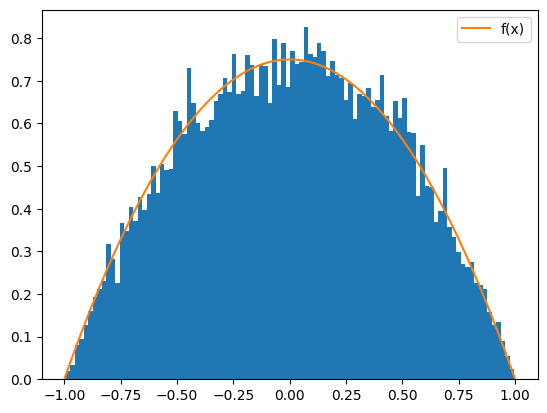

In [24]:
# Metropolis-hastings algorithm for f(x) = 3/4(1-x^2)

# Define the probability density function
def f(x):
    if (-1 < x < 1):
        return 3/4*(1-x**2)
    else:
        return 0


xt = [1-2*np.random.rand()] ## Choose an arbitrary number between 0 and 1 to start
# I chose to make this part of a list so I could append the new values at each itteration

# Sample 40000 values
for j in range(40000):
    xtemp = np.random.normal(xt[-1],1) ## Propose a new value for x 
    alpha = f(xtemp)/f(xt[-1]) # Calculate the acceptance ratio
    y = np.random.rand() # Find a uniformly distributed random value y
    if y <= alpha: 
        xt.append(xtemp) # If y <= alpha, accept the proposed value
    else:
        xt.append(xt[-1]) # If y > alpha, reject the proposed value

plt.hist(xt,bins = 100, density=True);
x = np.linspace(-1,1,1000)
y = [f(j) for j in x]
plt.plot(x,y, label = "f(x)")
plt.legend()

We can see that the values sampled is starting to look like the distribution we were trying to sample from

### Tasks

<b>Task 1</b><br>
The Weibull distribution is a continuous probability distribution that is used to model many different random variables, such as the failure rate of mechanisms where the probability of failure increases over time. In general, the probability density function has the form 
$$ f(x) = \begin{cases} \frac{kx^{k-1}}{\lambda^k}e^{-(x/\lambda)^k} & x \ge 0 \\ 0 & x < 0 \end{cases}$$

Plot the pdf for the Weibull distribution with $\lambda = 1$ and $k = 2$. Choose an appropriate range of $x$ values so that the main features of the pdf are clear. 

<b>Task 2</b><br>
By hand, find the inverse of the CDF for the Weibull distribution with $\lambda = 1$ and $k = 2$. Use a markdown box to record some of your steps. 

<b>Task 3</b> <br>
Use the inverse CDF you found in task 2 to generate 10000 samples from the Weibull distribution with $\lambda = 1$ and $k=2$. Plot a histogram with these samples and compare with your plot from task 1. 

Notes: Plot the samples and pdf from part 1 on the same axes in order to make the comparison clear.  Make sure to use the `density=True` argument in the histogram plot.

<b>Task 4 </b><br>
The Beta distribution is a continuous probability distribution that is used to describe percentages and proportions. The pdf for the Beta distribution is 
$$f(x) = \begin{cases} \frac{(\alpha+\beta-1)!}{(\alpha-1)!(\beta-1)!}x^{\alpha-1}(1-x)^{\beta-1} & x\in(0,1)\\ 0  & x\notin(0,1). \end{cases}$$

Create a function to compute the pdf of the Beta distribution. On the same axes, plot the pdf when $\alpha =1, \beta=1$, when $\alpha =2, \beta = 1$ and when $\alpha = 3, \beta = 4$.

<b> Task 5</b> <br>
Use the Metropolis-Hastings algorithm to sample 50,000 values from the Beta distribution with $\alpha = 2$ and $\beta = 1$. Plot a histogram with these samples and compare with your pdf from task 4.  